<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: CENSUS INCOME </span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">BASIC INFORMATION:DATATYPES:DATASET </span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df['Workclass'].nunique()

9

In [8]:
df['Education'].nunique()

16

In [9]:
df['Marital_status'].nunique()

7

In [10]:
for i in df.columns:
    if df[i].dtypes == 'O':
        print(i)
        print(df[i].nunique())


Workclass
9
Education
16
Marital_status
7
Occupation
15
Relationship
6
Race
5
Sex
2
Native_country
42
Income
2


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:Correlation of Categorical Data </span>

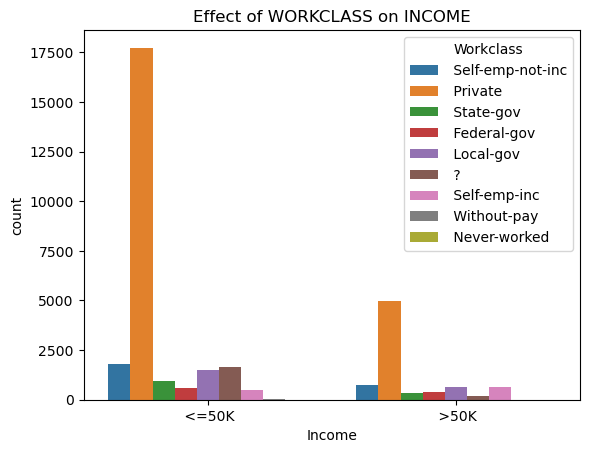

In [11]:
sns.countplot(x='Income', hue='Workclass', data=df)
plt.title("Effect of WORKCLASS on INCOME")
plt.show()

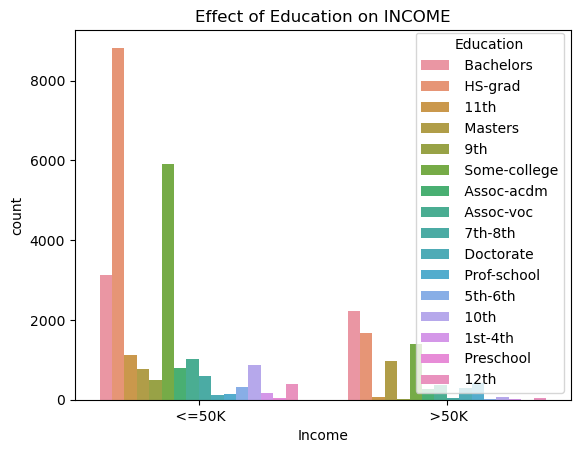

In [12]:
sns.countplot(x='Income', hue='Education', data=df)
plt.title("Effect of Education on INCOME")
plt.show()


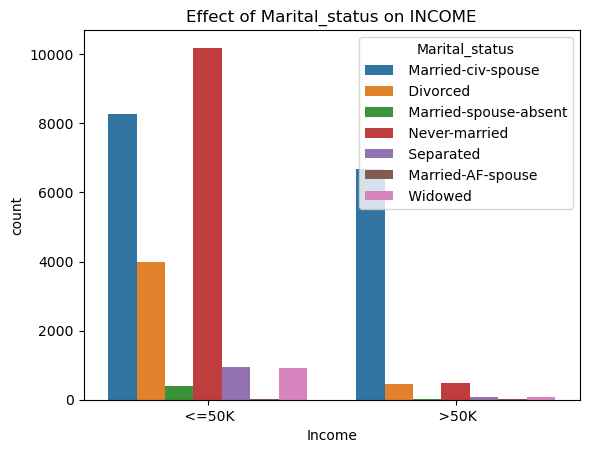

In [13]:

sns.countplot(x='Income', hue='Marital_status', data=df)
plt.title("Effect of Marital_status on INCOME")
plt.show()

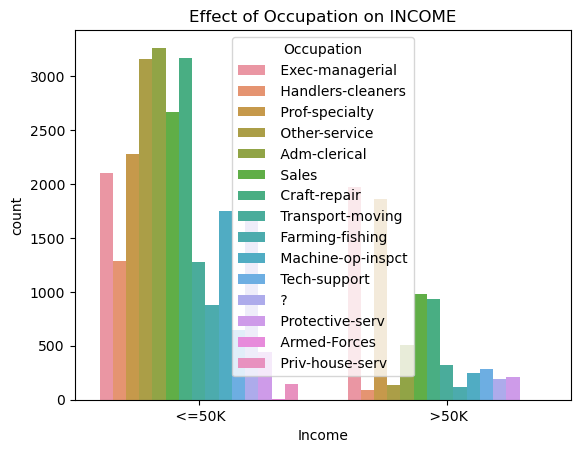

In [14]:
sns.countplot(x='Income', hue='Occupation', data=df)
plt.title("Effect of Occupation on INCOME")
plt.show()

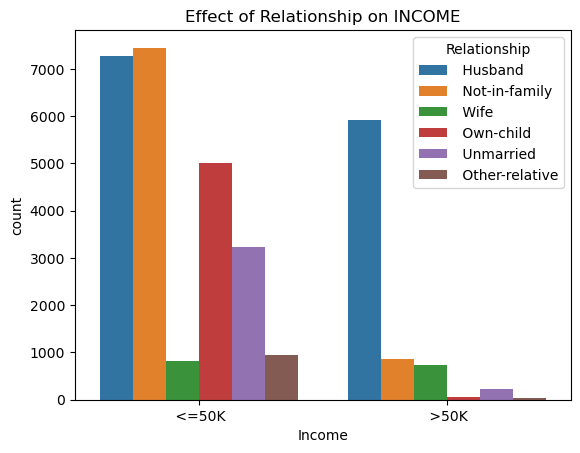

In [15]:
sns.countplot(x='Income', hue='Relationship', data=df)
plt.title("Effect of Relationship on INCOME")
plt.show()

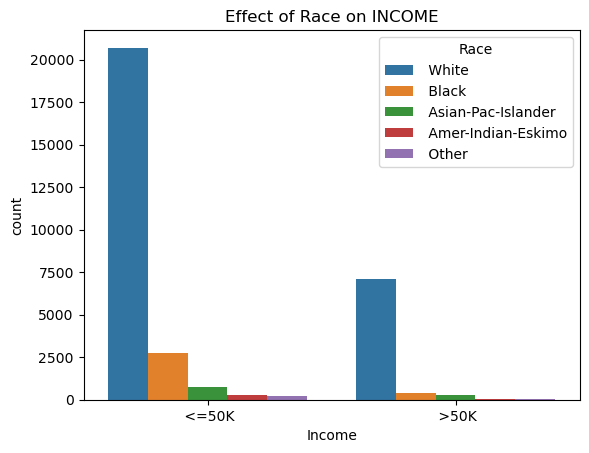

In [16]:
sns.countplot(x='Income', hue='Race', data=df)
plt.title("Effect of Race on INCOME")
plt.show()

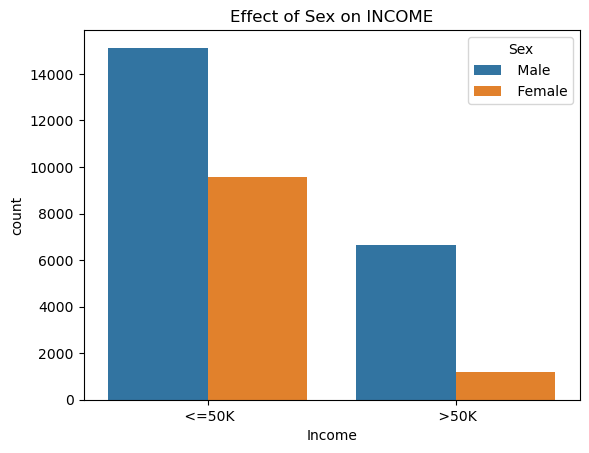

In [17]:
sns.countplot(x='Income', hue='Sex', data=df)
plt.title("Effect of Sex on INCOME")
plt.show()

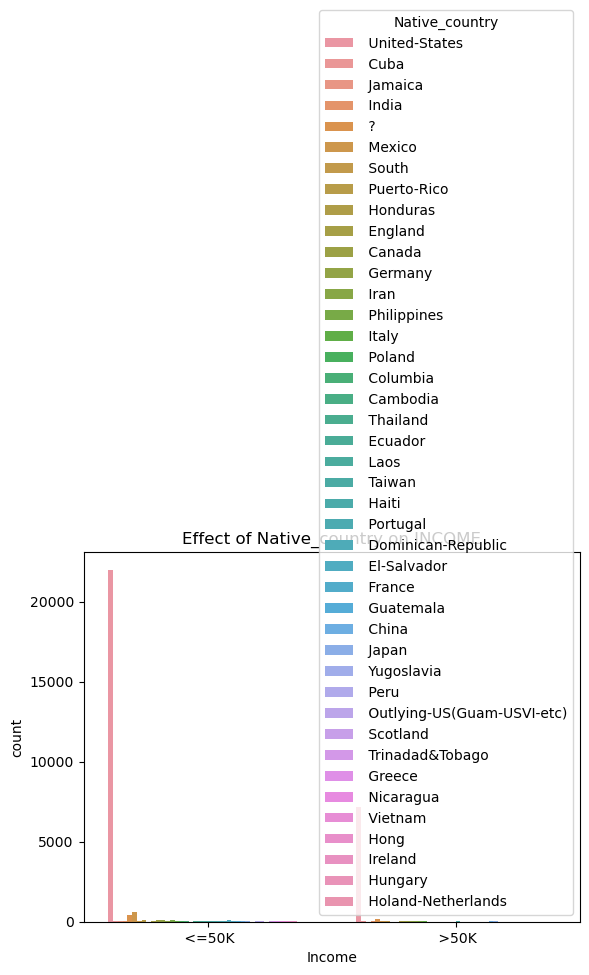

In [18]:
sns.countplot(x='Income', hue='Native_country', data=df)
plt.title("Effect of Native_country on INCOME")
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION: CORRELATION OF VARIABLE</span>

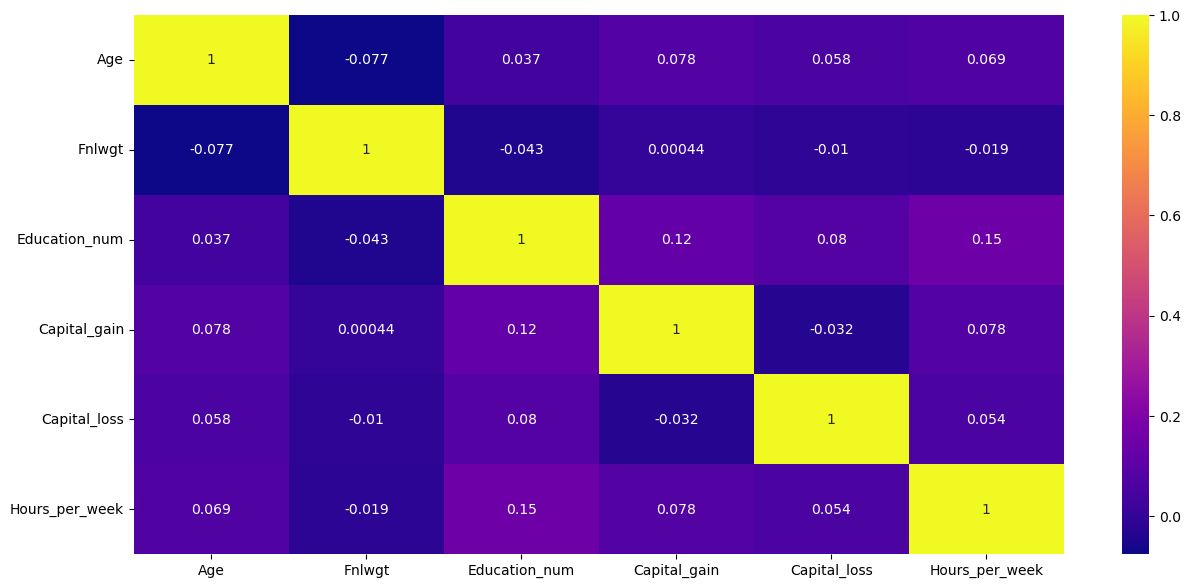

In [19]:
plt.figure(figsize=(15,7), facecolor='w')
sns.heatmap(df.corr(), annot=True,cmap='plasma')
plt.show()

In [20]:
df.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">EXTRACTING CATEGORICAL VARIABLE FROM DATASET</span>

In [21]:
for i in df.columns:
    if df[i].dtypes == 'O':
        print(i)

Workclass
Education
Marital_status
Occupation
Relationship
Race
Sex
Native_country
Income


In [22]:
df1=df.copy()



In [23]:
df2=df1.copy()

In [24]:
df2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
column_to_encode=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
le = LabelEncoder()
for col in column_to_encode:
    df2[col] = le.fit_transform(df2[col])
df2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [26]:
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [27]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [28]:
df2.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [29]:
df2.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


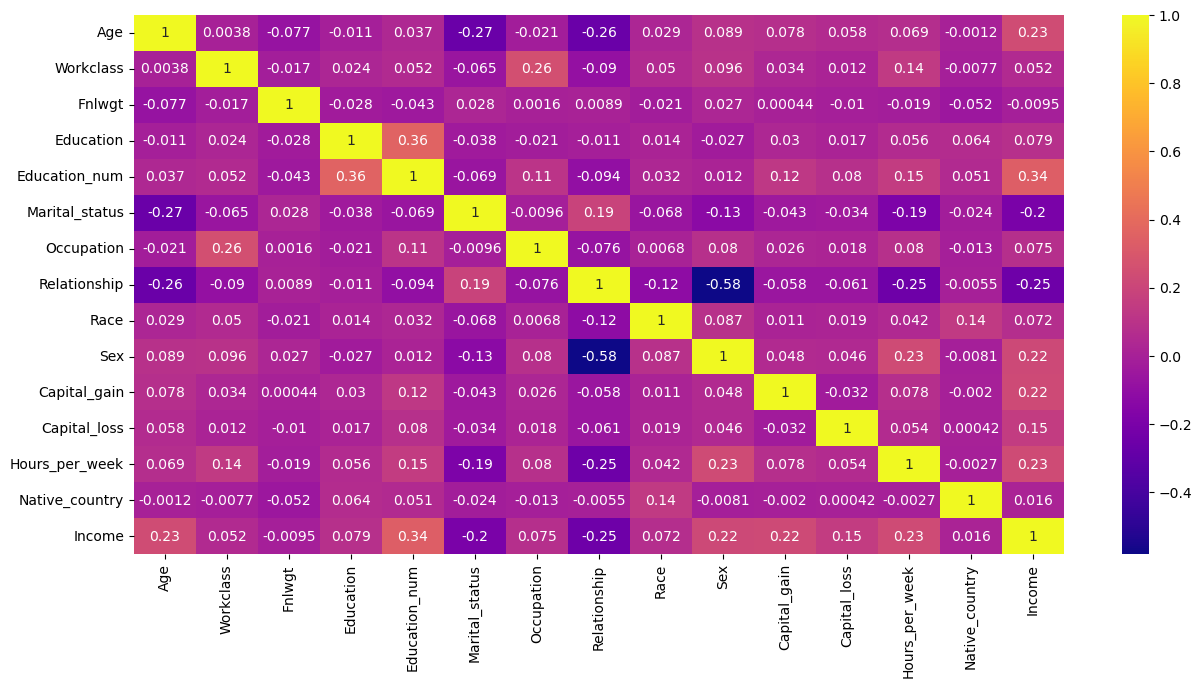

In [32]:
plt.figure(figsize=(15,7), facecolor='w')
sns.heatmap(df2.corr(), annot=True,cmap='plasma')
plt.show()

In [33]:
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
df3=df1.copy()

In [35]:
df3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df3.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [37]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df3.columns:
    if df[i].dtypes=='float64':
        if pltnum<16:
            plt.subplot(6,3, pltnum)
            sns.distplot(df3[i], color='r')
            plt.xlabel(i)
    pltnum+=1
plt.show()

<Figure size 1000x1500 with 0 Axes>

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">Obesrvation: When we implemented Encoded technique to Categorical Data, this data type converts into int32, and default numerical datatype already present in DataSet has int64</span>

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:SKEWNESS IN DATA</span>

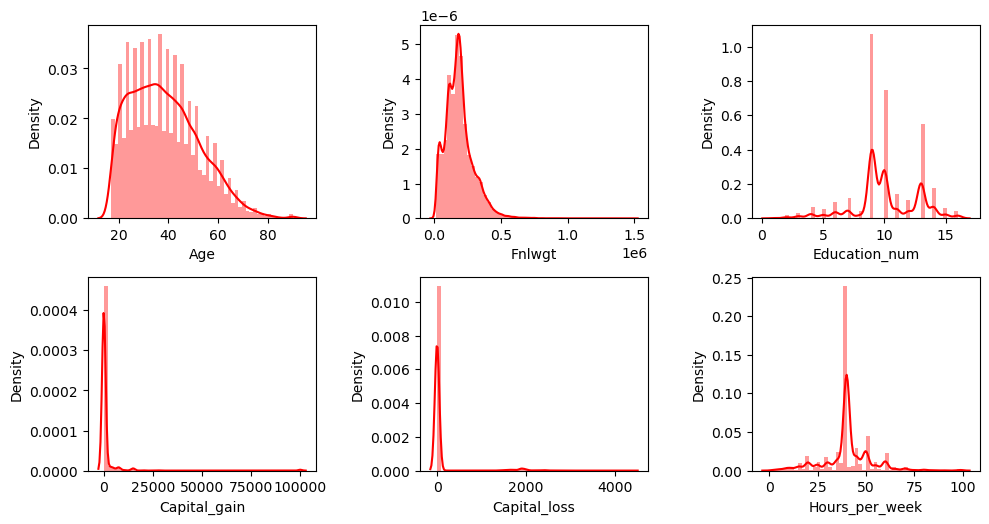

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df3.columns:
    if df3[i].dtypes == 'int64':  
        if pltnum < 16:
            plt.subplot(6, 3, pltnum)
            sns.distplot(df3[i], color='r')
            plt.xlabel(i)
            pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [40]:
for i in df3.columns:
    if df3[i].dtypes == 'int64': 
        skewness=df3[i].skew()
    
        print(f"Skewness for column {i}: {skewness}")


Skewness for column Age: 0.5587376395152729
Skewness for column Fnlwgt: 1.4469722429475549
Skewness for column Education_num: -0.31162989158397764
Skewness for column Capital_gain: 11.953689856702193
Skewness for column Capital_loss: 4.594548858598902
Skewness for column Hours_per_week: 0.22763579151335658


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BOX-COX TRANSFORMATION: CORRECTION OF SKEWNESS</span>

In [42]:
for i in df3.columns:
    if df3[i].dtypes == 'int64': 
        skewness=df3[i].skew()
        if skewness > 0.5:
            # Apply Box-Cox transformation
            transformed_col, _ = boxcox(df3[i] + 1)  # Adding 1 to avoid zero values
            df3[i] = transformed_col

# Display the DataFrame after skewness correction
print(df3)

            Age          Workclass      Fnlwgt    Education  Education_num  \
0      5.411967   Self-emp-not-inc  274.417665    Bachelors             13   
1      4.929182            Private  410.194889      HS-grad              9   
2      5.517448            Private  425.134766         11th              7   
3      4.418778            Private  496.082736    Bachelors             13   
4      4.883490            Private  461.129813      Masters             14   
...         ...                ...         ...          ...            ...   
32555  4.359857            Private  441.936377   Assoc-acdm             12   
32556  5.017671            Private  356.195231      HS-grad              9   
32557  5.682718            Private  353.782108      HS-grad              9   
32558  4.035428            Private  398.604480      HS-grad              9   
32559  5.482850       Self-emp-inc  463.408488      HS-grad              9   

            Marital_status          Occupation    Relationship 

In [43]:
df3.skew()

Age              -0.013897
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

Interpretation:

The skewness values provide insights into the shape of the distribution of each feature.
For features like Age and Fnlwgt, skewness close to zero indicates a roughly symmetrical distribution.
For features like Capital_gain and Capital_loss, high positive skewness values indicate a right-skewed distribution, suggesting that there might be a concentration of lower values and a long right tail.

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [46]:
df3


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,5.411967,Self-emp-not-inc,274.417665,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K
1,4.929182,Private,410.194889,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K
2,5.517448,Private,425.134766,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K
3,4.418778,Private,496.082736,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K
4,4.883490,Private,461.129813,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4.359857,Private,441.936377,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,United-States,<=50K
32556,5.017671,Private,356.195231,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,United-States,>50K
32557,5.682718,Private,353.782108,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States,<=50K
32558,4.035428,Private,398.604480,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States,<=50K


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold "> STATS OF DATASET</span>

In [47]:
df3.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,4.866348,373.825806,10.080590,0.061157,0.016343,40.437469
std,0.611726,91.210819,2.572709,0.202932,0.073880,12.347618
min,3.644729,121.581329,1.000000,0.000000,0.000000,1.000000
25%,4.418778,317.765614,9.000000,0.000000,0.000000,40.000000
50%,4.883490,378.603799,10.000000,0.000000,0.000000,40.000000
75%,5.338693,426.913325,12.000000,0.000000,0.000000,45.000000
max,6.524910,924.759325,16.000000,0.734524,0.350316,99.000000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING OUTLIERS IN DATASET</span>

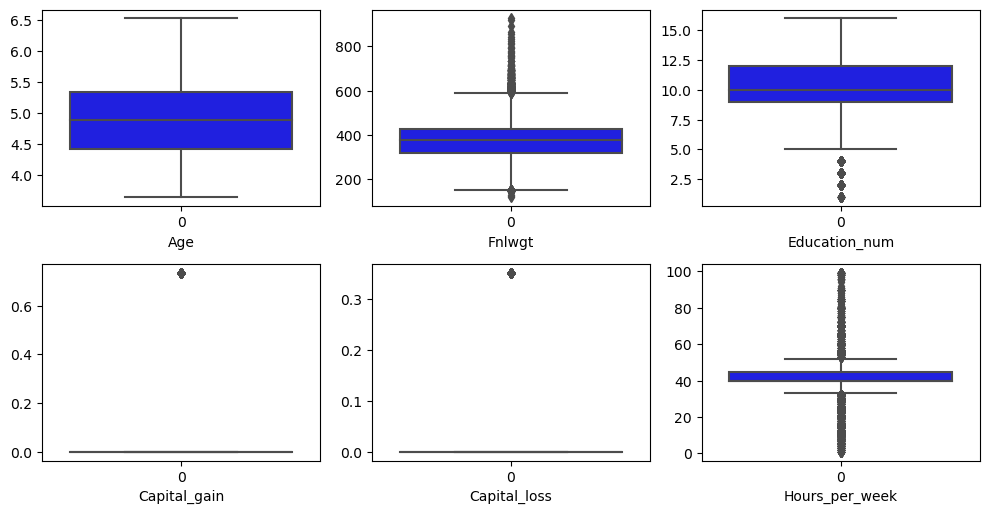

In [54]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df3.columns:
        if df3[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 16:
                plt.subplot(6, 3, pltnum)
                sns.boxplot(df3[i], color='b')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">REMOVAL OF OUTLIERS FROM DATASET</span>


In [65]:
from scipy.stats import zscore

# Iterate over columns in the DataFrame
for i in df3.columns:
    # Check if the column is of type 'int64' or 'float64'
    if df3[i].dtypes in ['int64', 'float64']:
        # Calculate z-scores for the current column
        z_score = zscore(df3[i])
        
        # Identify and filter out outliers using z-scores
        outliers = (np.abs(z_score) > 3)
        df3 = df3[~outliers]

# Display the DataFrame after removing outliers
print(df3)


            Age          Workclass      Fnlwgt      Education  Education_num  \
0      5.411967   Self-emp-not-inc  274.417665      Bachelors             13   
1      4.929182            Private  410.194889        HS-grad              9   
2      5.517448            Private  425.134766           11th              7   
3      4.418778            Private  496.082736      Bachelors             13   
4      4.883490            Private  461.129813        Masters             14   
...         ...                ...         ...            ...            ...   
32554  4.035428            Private  478.172525   Some-college             10   
32555  4.359857            Private  441.936377     Assoc-acdm             12   
32556  5.017671            Private  356.195231        HS-grad              9   
32557  5.682718            Private  353.782108        HS-grad              9   
32558  4.035428            Private  398.604480        HS-grad              9   

            Marital_status          Occ

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALZATION: AFTER CORRECTION OF  OUTLIERS IN DATASET</span>


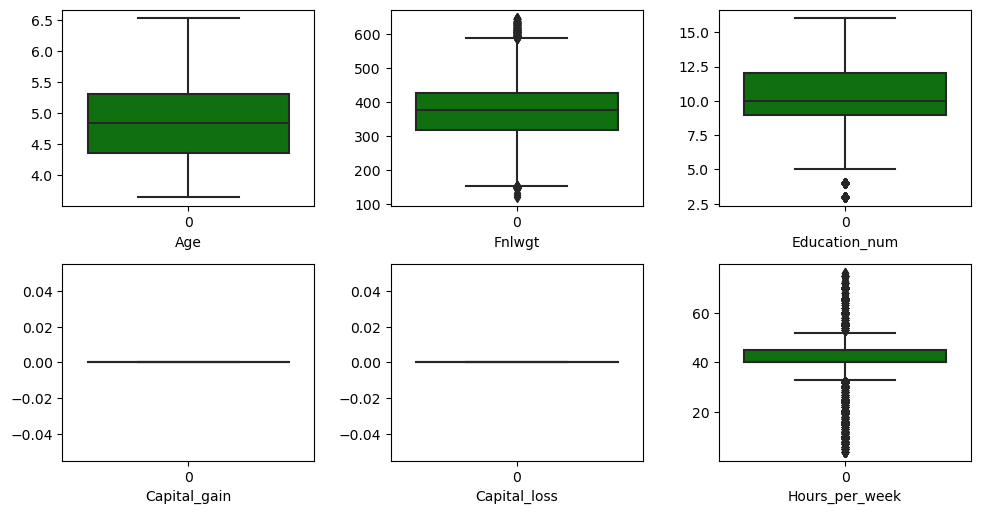

In [66]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df3.columns:
        if df3[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 16:
                plt.subplot(6, 3, pltnum)
                sns.boxplot(df3[i], color='g')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [67]:
df4=df3.copy()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">ENCODING CATEGORICAL FEATURES</SPAN>

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27656 entries, 0 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27656 non-null  float64
 1   Workclass       27656 non-null  object 
 2   Fnlwgt          27656 non-null  float64
 3   Education       27656 non-null  object 
 4   Education_num   27656 non-null  int64  
 5   Marital_status  27656 non-null  object 
 6   Occupation      27656 non-null  object 
 7   Relationship    27656 non-null  object 
 8   Race            27656 non-null  object 
 9   Sex             27656 non-null  object 
 10  Capital_gain    27656 non-null  float64
 11  Capital_loss    27656 non-null  float64
 12  Hours_per_week  27656 non-null  int64  
 13  Native_country  27656 non-null  object 
 14  Income          27656 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 4.4+ MB


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IMPLEMENTATION OF LABEL ENCODING</span>

In [69]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']

# Apply LabelEncoder to each specified column in the original DataFrame
df4[columns_to_encode] = df4[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df4.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,5.411967,6,274.417665,8,13,2,4,0,4,1,0.0,0.0,13,38,0
1,4.929182,4,410.194889,10,9,0,6,1,4,1,0.0,0.0,40,38,0
2,5.517448,4,425.134766,1,7,2,6,0,2,1,0.0,0.0,40,38,0
3,4.418778,4,496.082736,8,13,2,10,5,2,0,0.0,0.0,40,5,0
4,4.883490,4,461.129813,11,14,2,4,5,4,0,0.0,0.0,40,38,0


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SEPRATING INPUT VARIABLE</span>

In [78]:
X=df4.drop('Income', axis=1)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,5.411967,6,274.417665,8,13,2,4,0,4,1,0.0,0.0,13,38
1,4.929182,4,410.194889,10,9,0,6,1,4,1,0.0,0.0,40,38
2,5.517448,4,425.134766,1,7,2,6,0,2,1,0.0,0.0,40,38
3,4.418778,4,496.082736,8,13,2,10,5,2,0,0.0,0.0,40,5
4,4.883490,4,461.129813,11,14,2,4,5,4,0,0.0,0.0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,4.035428,4,478.172525,13,10,4,11,1,4,1,0.0,0.0,40,38
32555,4.359857,4,441.936377,6,12,2,13,5,4,0,0.0,0.0,38,38
32556,5.017671,4,356.195231,10,9,2,7,0,4,1,0.0,0.0,40,38
32557,5.682718,4,353.782108,10,9,6,1,4,4,0,0.0,0.0,40,38


In [83]:
X.shape

(27656, 14)

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SEPRATING TARGET VARIABLE</span>

In [81]:
Y=df4['Income']
Y

0        0
1        0
2        0
3        0
4        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 27656, dtype: int32

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING THE DATA IN X, Y : TRAINING, TESTING</span>

In [82]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

In [84]:
X_train.shape

(19359, 14)

In [85]:
X_test.shape

(8297, 14)

In [87]:
Y_train.shape

(19359,)

In [90]:
Y_test.shape

(8297,)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


          Variable        VIF
0              Age  39.241689
1        Workclass   8.657310
2           Fnlwgt  16.157768
3        Education   9.394509
4    Education_num  20.697445
5   Marital_status   4.031158
6       Occupation   3.670356
7     Relationship   2.698313
8             Race  18.406913
9              Sex   4.201419
10    Capital_gain        NaN
11    Capital_loss        NaN
12  Hours_per_week  14.868272
13  Native_country  21.764420


In [93]:
X = X.drop(['Age', 'Native_country'], axis=1)


KeyError: "['Age', 'Native_country'] not found in axis"

In [94]:
X

,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,6,274.417665,8,13,2,4,0,4,1,0.0,0.0,13
1,4,410.194889,10,9,0,6,1,4,1,0.0,0.0,40
2,4,425.134766,1,7,2,6,0,2,1,0.0,0.0,40
3,4,496.082736,8,13,2,10,5,2,0,0.0,0.0,40
4,4,461.129813,11,14,2,4,5,4,0,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,4,478.172525,13,10,4,11,1,4,1,0.0,0.0,40
32555,4,441.936377,6,12,2,13,5,4,0,0.0,0.0,38
32556,4,356.195231,10,9,2,7,0,4,1,0.0,0.0,40
32557,4,353.782108,10,9,6,1,4,4,0,0.0,0.0,40


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VIF</span>

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

          Variable        VIF
0        Workclass   8.439570
1           Fnlwgt  14.433445
2        Education   9.256339
3    Education_num  19.055173
4   Marital_status   3.978264
5       Occupation   3.668166
6     Relationship   2.640663
7             Race  15.296730
8              Sex   4.162641
9     Capital_gain        NaN
10    Capital_loss        NaN
11  Hours_per_week  13.504193


In [98]:
# Example: Drop 'Fnlwgt' and 'Race' based on high VIF
X = X.drop(['Fnlwgt', 'Race'], axis=1)
X

,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,6,8,13,2,4,0,1,0.0,0.0,13
1,4,10,9,0,6,1,1,0.0,0.0,40
2,4,1,7,2,6,0,1,0.0,0.0,40
3,4,8,13,2,10,5,0,0.0,0.0,40
4,4,11,14,2,4,5,0,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...
32554,4,13,10,4,11,1,1,0.0,0.0,40
32555,4,6,12,2,13,5,0,0.0,0.0,38
32556,4,10,9,2,7,0,1,0.0,0.0,40
32557,4,10,9,6,1,4,0,0.0,0.0,40


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VIF</span>

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

         Variable        VIF
0       Workclass   8.047856
1       Education   9.129849
2   Education_num  17.276658
3  Marital_status   3.770941
4      Occupation   3.662083
5    Relationship   2.475439
6             Sex   3.926947
7    Capital_gain        NaN
8    Capital_loss        NaN
9  Hours_per_week  12.114334


In [102]:
from sklearn.decomposition import PCA

# Example: Apply PCA
pca = PCA(n_components=10)  # Choose an appropriate number of components
X_pca = pca.fit_transform(X)


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

         Variable        VIF
0       Workclass   8.047856
1       Education   9.129849
2   Education_num  17.276658
3  Marital_status   3.770941
4      Occupation   3.662083
5    Relationship   2.475439
6             Sex   3.926947
7    Capital_gain        NaN
8    Capital_loss        NaN
9  Hours_per_week  12.114334


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 1.47934714, -0.32979274,  1.23487752, ...,  0.        ,
         0.        , -2.38423266],
       [ 0.09848667,  0.25212885, -0.40922809, ...,  0.        ,
         0.        ,  0.03460564],
       [ 0.09848667, -2.36651832, -1.23128089, ...,  0.        ,
         0.        ,  0.03460564],
       ...,
       [ 0.09848667,  0.25212885, -0.40922809, ...,  0.        ,
         0.        ,  0.03460564],
       [ 0.09848667,  0.25212885, -0.40922809, ...,  0.        ,
         0.        ,  0.03460564],
       [ 0.09848667,  0.25212885, -0.40922809, ...,  0.        ,
         0.        , -1.75712644]])

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">MODEL IMPORT</span>

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</span>

In [108]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)

Accuracy Score at Random State 1 is 0.8319874653489213
Accuracy Score at Random State 2 is 0.822948053513318
Accuracy Score at Random State 3 is 0.8336748222249005
Accuracy Score at Random State 4 is 0.8266843437387007
Accuracy Score at Random State 5 is 0.829938531999518
Accuracy Score at Random State 6 is 0.8358442810654454
Accuracy Score at Random State 7 is 0.8275280221766904
Accuracy Score at Random State 8 is 0.8321079908400627
Accuracy Score at Random State 9 is 0.8342774496806075
Accuracy Score at Random State 10 is 0.8245148848981559
Accuracy Score at Random State 11 is 0.8298180065083766
Accuracy Score at Random State 12 is 0.8222249005664698
Accuracy Score at Random State 13 is 0.8292153790526696
Accuracy Score at Random State 14 is 0.8350006026274557
Accuracy Score at Random State 15 is 0.8262022417741353
Accuracy Score at Random State 16 is 0.8307822104375076
Accuracy Score at Random State 17 is 0.82837170061468
Accuracy Score at Random State 18 is 0.8313848378932144
Accur

Accuracy Score at Random State 149 is 0.8307822104375076
Accuracy Score at Random State 150 is 0.8317464143666385
Accuracy Score at Random State 151 is 0.8289743280703868
Accuracy Score at Random State 152 is 0.8333132457514765
Accuracy Score at Random State 153 is 0.8272869711944076
Accuracy Score at Random State 154 is 0.8345185006628902
Accuracy Score at Random State 155 is 0.8339158732071833
Accuracy Score at Random State 156 is 0.8286127515969628
Accuracy Score at Random State 157 is 0.8321079908400627
Accuracy Score at Random State 158 is 0.830300108472942
Accuracy Score at Random State 159 is 0.8294564300349524
Accuracy Score at Random State 160 is 0.8281306496323972
Accuracy Score at Random State 161 is 0.8280101241412559
Accuracy Score at Random State 162 is 0.831264312402073
Accuracy Score at Random State 163 is 0.827407496685549
Accuracy Score at Random State 164 is 0.8294564300349524
Accuracy Score at Random State 165 is 0.8296974810172352
Accuracy Score at Random State 166

Accuracy Score at Random State 293 is 0.8282511751235386
Accuracy Score at Random State 294 is 0.8268048692298421
Accuracy Score at Random State 295 is 0.8406653007111003
Accuracy Score at Random State 296 is 0.8259611907918525
Accuracy Score at Random State 297 is 0.8377726889237074
Accuracy Score at Random State 298 is 0.8319874653489213
Accuracy Score at Random State 299 is 0.8389779438351211
Maximum Accuracy Score is 0.8406653007111003 at Random State 295


<span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">Maximum Accuracy Score is 0.8406653007111003 at Random State 295</span>


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOGISTIC REGRESSION</SPAN>


In [109]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=295)

lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8406653007111003
Confusion Matrix  [[6529 1093]
 [ 229  446]]
Classfication Reports                precision    recall  f1-score   support

           0       0.97      0.86      0.91      7622
           1       0.29      0.66      0.40       675

    accuracy                           0.84      8297
   macro avg       0.63      0.76      0.66      8297
weighted avg       0.91      0.84      0.87      8297



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>

In [110]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8269253947209835
Confusion Matrix  [[6128  806]
 [ 630  733]]
Classfication Reports                precision    recall  f1-score   support

           0       0.91      0.88      0.90      6934
           1       0.48      0.54      0.51      1363

    accuracy                           0.83      8297
   macro avg       0.69      0.71      0.70      8297
weighted avg       0.84      0.83      0.83      8297



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>


In [111]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8412679281668073
Confusion Matrix  [[6246  805]
 [ 512  734]]
Classfication Reports                precision    recall  f1-score   support

           0       0.92      0.89      0.90      7051
           1       0.48      0.59      0.53      1246

    accuracy                           0.84      8297
   macro avg       0.70      0.74      0.72      8297
weighted avg       0.86      0.84      0.85      8297



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [112]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8411474026756659
Confusion Matrix  [[6218  778]
 [ 540  761]]
Classfication Reports                precision    recall  f1-score   support

           0       0.92      0.89      0.90      6996
           1       0.49      0.58      0.54      1301

    accuracy                           0.84      8297
   macro avg       0.71      0.74      0.72      8297
weighted avg       0.85      0.84      0.85      8297



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>


In [113]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8544052067012173
Confusion Matrix  [[6378  828]
 [ 380  711]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      0.89      0.91      7206
           1       0.46      0.65      0.54      1091

    accuracy                           0.85      8297
   macro avg       0.70      0.77      0.73      8297
weighted avg       0.88      0.85      0.86      8297



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [114]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8582620224177413
Confusion Matrix  [[6406  824]
 [ 352  715]]
Classfication Reports                precision    recall  f1-score   support

           0       0.95      0.89      0.92      7230
           1       0.46      0.67      0.55      1067

    accuracy                           0.86      8297
   macro avg       0.71      0.78      0.73      8297
weighted avg       0.89      0.86      0.87      8297



<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [115]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score1)
print("Mean of Cross Validation score is", cv_score1.mean())
print("Standard Deviation of Cross Validation score is", cv_score1.std())

Cross Validation score is [0.82628344 0.83167601 0.83004882 0.8327608  0.83149521]
Mean of Cross Validation score is 0.8304528554170387
Standard Deviation of Cross Validation score is 0.0022563901100692498


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [116]:
cv_score2=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score2)
print("Mean of Cross Validation score is", cv_score2.mean())
print("Standard Deviation of Cross Validation score is", cv_score2.std())

Cross Validation score is [0.82592191 0.82824082 0.82100886 0.82986802 0.82570964]
Mean of Cross Validation score is 0.8261498491444985
Standard Deviation of Cross Validation score is 0.002995745952985947


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [117]:
cv_score3=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score3)
print("Mean of Cross Validation score is", cv_score3.mean())
print("Standard Deviation of Cross Validation score is", cv_score3.std())

Cross Validation score is [0.83152567 0.82968722 0.82661363 0.83746158 0.83493039]
Mean of Cross Validation score is 0.8320436982220635
Standard Deviation of Cross Validation score is 0.0038208224271209863


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [118]:
cv_score4=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score4)
print("Mean of Cross Validation score is", cv_score4.mean())
print("Standard Deviation of Cross Validation score is", cv_score4.std())

Cross Validation score is [0.8318872  0.83926957 0.82914482 0.84143916 0.83800398]
Mean of Cross Validation score is 0.8359489464038425
Standard Deviation of Cross Validation score is 0.004651581794936869


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>


In [119]:
cv_score5=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score5)
print("Mean of Cross Validation score is", cv_score5.mean())
print("Standard Deviation of Cross Validation score is", cv_score5.std())

Cross Validation score is [0.84219089 0.84939432 0.85011752 0.86060387 0.85084072]
Mean of Cross Validation score is 0.8506294633560163
Standard Deviation of Cross Validation score is 0.005874190787605887


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [120]:
cv_score6=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score6)
print("Mean of Cross Validation score is", cv_score6.mean())
print("Standard Deviation of Cross Validation score is", cv_score6.std())

Cross Validation score is [0.84454085 0.85065992 0.85138311 0.85988067 0.85264871]
Mean of Cross Validation score is 0.851822652654015
Standard Deviation of Cross Validation score is 0.004902729926865555


<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">INTERPRETATION</SPAN>

In general, when comparing models for hyperparameter tuning, we should consider both the mean cross-validation score and the standard deviation. Here are some guidelines:

Mean Cross-Validation Score:

A higher mean cross-validation score indicates better average performance.
Choose the model with a higher mean score.

Standard Deviation of Cross-Validation Score:
A lower standard deviation indicates less variability in performance across different folds.
A lower standard deviation suggests more stable and consistent performance.


<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">KEY OBSERVATION</SPAN>

Logistic Regression:

Mean: 0.8305
Standard Deviation: 0.0023

Gradient Boost Classifier:
Mean: 0.8518
Standard Deviation: 0.0049

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CONCLUSION</SPAN>

In this case, the Gradient Boost Classifier has a higher mean cross-validation score and a slightly higher standard deviation. It's generally a good idea to choose the model with the higher mean score, but also consider the standard deviation to ensure stability in performance across different folds.

Therefore, based on the calculated information, the Gradient Boost Classifier seems to be the better-performing model. We can proceed with hyperparameter tuning for the Gradient Boost Classifier.

<span style="color:Blue;font-size: 25px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>


<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=295)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)


KeyboardInterrupt: 

<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">AS GRID SEARCH CV TAKING SIGNIFICANT AMOUNT OF TIME TO GIVE OUTPUE, HENCE WE HAVE USED RANDOMISED SEARCH CV</SPAN>

<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">RANDOMISED SEARCH CV</SPAN>

In [123]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for random search
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
Y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(Y_test, Y_pred_random)

print("Best Hyperparameters (Random Search):", best_params_random)
print("Accuracy on Test Set (Random Search):", accuracy_random)


Best Hyperparameters (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy on Test Set (Random Search): 0.860069904784862


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [124]:
gbc=GradientBoostingClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_depth= 5, learning_rate= 0.1)
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.860069904784862
Confusion Matrix  [[6350  753]
 [ 408  786]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      0.89      0.92      7103
           1       0.51      0.66      0.58      1194

    accuracy                           0.86      8297
   macro avg       0.73      0.78      0.75      8297
weighted avg       0.88      0.86      0.87      8297



<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:HEATMAP-CONFUSION MATRIX</span>

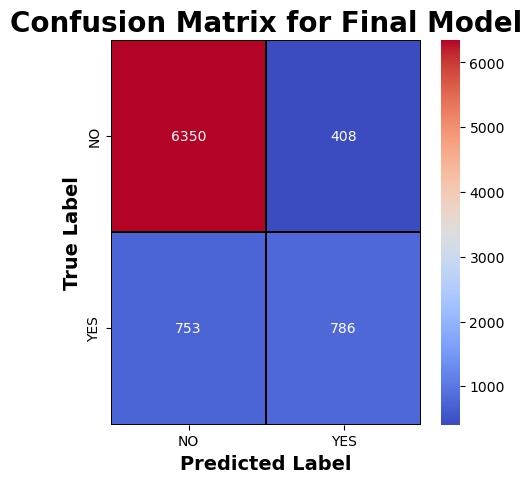

In [125]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">AUC:ROC CURVE</span>

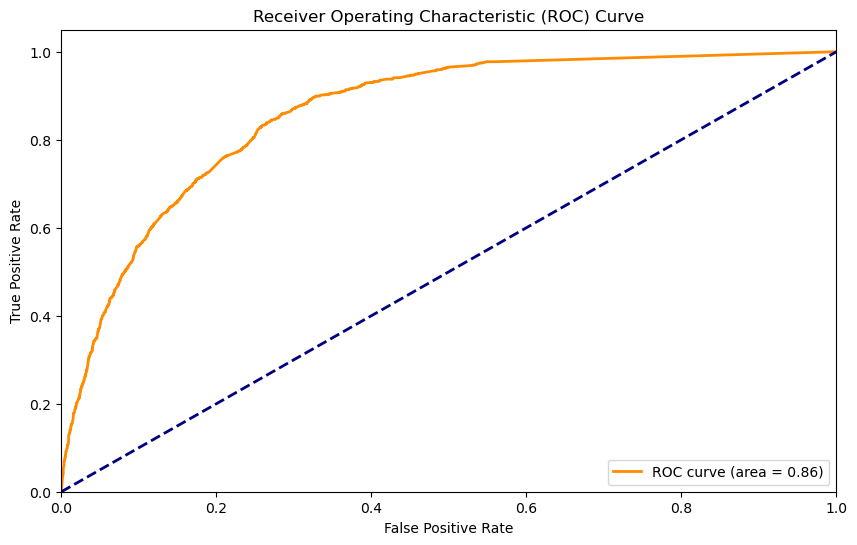

In [126]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [127]:
import joblib
joblib.dump(gbc,'CensusIncome.pkl')

['CensusIncome.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [128]:
prediction = lr.predict(X_test)


In [130]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,0,1
1,0,1
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0
